In [3]:
pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.9/390.2 MB 19.6 MB/s eta 0:00:20
   ---------------------------------------- 1.7/390.2 MB 21.3 MB/s eta 0:00:19
   ---------------------------------------- 2.4/390.2 MB 17.1 MB/s eta 0:00:23
   ---------------------------------------- 3.3/390.2 MB 18.9 MB/s eta 0:00:21
   ---------------------------------------- 3.4/390.2 MB 16.6 MB/s eta 0:00:24
   ---------------------------------------- 4.2/390.2 MB 15.6 MB/s eta 0:00:25
   ---------------------------------------- 4.4/390.2 MB 14.6 MB/s eta 0:00:27
    --------------------------------------- 5.4/390.2 MB 15.0 MB/s eta 0:00:26
    --------------------------------------- 6.0/390.2 MB 14.8 MB/s eta 0:00:27
    --------------------------------------- 6.7/390.2 MB 14.3 MB/s

In [60]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10 #datasets
from tensorflow.keras.models import Sequential #model creation
from tensorflow.keras.layers import Dense, Flatten #hidden layers
from tensorflow.keras.optimizers import SGD #optimizer
import matplotlib.pyplot as plt
import random

In [30]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [31]:
input_shape=(28,28)
num_classes=10

In [32]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [39]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


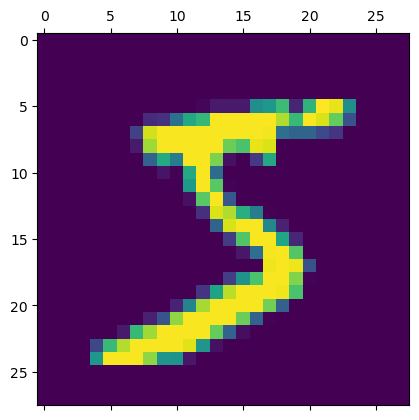

In [40]:
plt.matshow(x_train[0])

In [41]:
model=Sequential([Flatten(input_shape=input_shape),Dense(128,activation='relu'),Dense(num_classes,activation='softmax')])

In [42]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
#compile the model
model.compile(optimizer=SGD(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [44]:
#train the model
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7372 - loss: 1.0120 - val_accuracy: 0.9068 - val_loss: 0.3517
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9035 - loss: 0.3496 - val_accuracy: 0.9200 - val_loss: 0.2923
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9171 - loss: 0.2998 - val_accuracy: 0.9274 - val_loss: 0.2622
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9261 - loss: 0.2642 - val_accuracy: 0.9325 - val_loss: 0.2419
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9315 - loss: 0.2456 - val_accuracy: 0.9380 - val_loss: 0.2212
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9372 - loss: 0.2229 - val_accuracy: 0.9419 - val_loss: 0.2062
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9427 - loss: 0.2057 - val_accuracy: 0.9440 - val_loss: 0.1950
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9459 - loss: 0.1924 - 

In [48]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 - 0s - 1ms/step - accuracy: 0.9512 - loss: 0.1634
Test Loss: 0.16340272128582
Test Accuracy: 0.951200008392334


In [54]:

train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

In [49]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

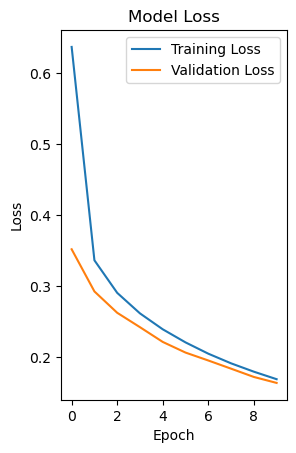

In [53]:
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

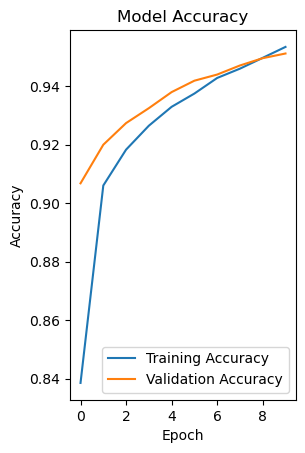

In [58]:
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()